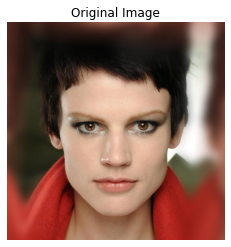

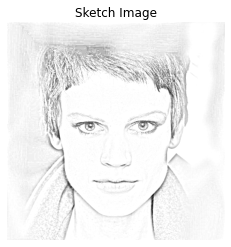

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_img(image, label, sketch=False):
    plt.figure(figsize=(4, 4))
    if sketch:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.title(label)
    plt.show()

def image2sketch(real_path, sketch_path):
    real_img = cv2.imread(real_path)
    real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)
    inverted_img = 255 - gray_img
    smoothed_img = cv2.GaussianBlur(inverted_img, (21, 21), sigmaX=0, sigmaY=0)
    sketch_img = cv2.divide(gray_img, 255 - smoothed_img, scale=255)
    cv2.imwrite(sketch_path, sketch_img)
    return real_img, sketch_img

real_img, sketch_img = image2sketch('/content/0.jpg', '/content/0_sketch.jpg')

show_img(real_img, 'Original Image')
show_img(sketch_img, 'Sketch Image', True)